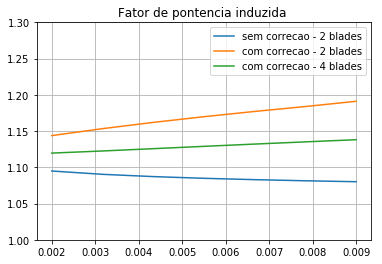

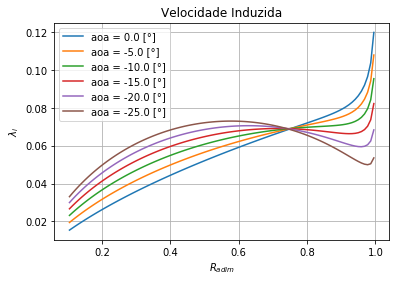

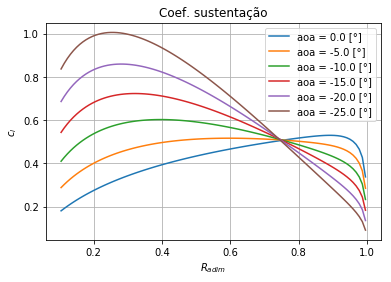

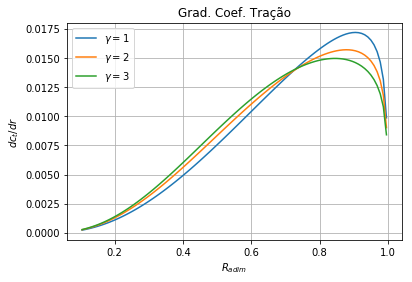

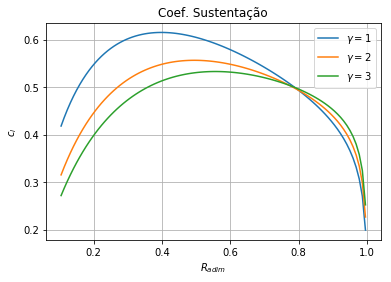

In [6]:
import BladeElementMoment as bem
import numpy as np
import matplotlib.pyplot as plt

#Atividade 04

## definindo rotor
rotor1 = bem.Rotor(cla= 5.9, ctreq = np.linspace(0.002,0.009,num=7) , solidEqui=0.1, numberBlades=2, twist=0)

## montando a simulação
simulacao = bem.Bemt(rotor1, correcao=False)
__,__,vel_induzida,__,k1,__,__ = simulacao.solver()

simulacao = bem.Bemt(rotor1, correcao=True)
__,__,__,__,k2,__,__ = simulacao.solver()

rotor1.numberBlades = 4
simulacao = bem.Bemt(rotor1, correcao=True)
__,__,__,__,k3,__,__ = simulacao.solver()

plt.title('Fator de pontencia induzida ')
plt.plot(rotor1.ctreq[ k1 != 0 ], k1[k1 != 0], label = 'sem correcao - 2 blades')
plt.plot(rotor1.ctreq[ k2 != 0 ], k2[k2 != 0], label = 'com correcao - 2 blades')
plt.plot(rotor1.ctreq[ k3 != 0 ], k3[k3 != 0], label = 'com correcao - 4 blades')
plt.ylim([1,1.3])
plt.grid()
plt.legend()

# Atividade 05

## definição das configurações do roto


twist = np.linspace(0, -25, num = 6)
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

for i in twist:

    rotor2 = bem.Rotor(cla= 5.9, ctreq=[0.008], solidEqui=0.1, numberBlades=4, twist=i)
    rotor2.setArrato(cd0=0.01)

    ## montar a simulação
    simulacao2 = bem.Bemt(rotor2, correcao=True)
    __, __, vel_induzida, cl, __, __, __ = simulacao2.solver()

    
    ax1.plot(simulacao2.r_adim, vel_induzida[0,:], label = f'aoa = {i} [°]')
    ax2.plot(simulacao2.r_adim, cl,  label = f'aoa = {i} [°]')
    
ax1.set_title('Velocidade Induzida')  
ax1.grid()
ax1.set_xlabel('$R_{adim}$')
ax1.set_ylabel('$\lambda_i$')
ax1.legend()

ax2.set_title('Coef. sustentação')  
ax2.grid()
ax2.set_xlabel('$R_{adim}$')
ax2.set_ylabel('$c_l$')
ax2.legend()

  

# Atividade 07

fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()

## definição do rotor
rotor3 = bem.Rotor(cla= 5.9, ctreq=[0.008], solidEqui=0.1, numberBlades=2, twist=-10)
rotor3.setArrato(cd0=0.01, d1 = 0.025, d2 = 0.65)

rotor3.setAfilamento(gamma = 1)
# montando a simulação
simulacao3 = bem.Bemt(rotor3, correcao=True)
dct_dr1, __, vel_induzida1, cl1, __, __, __ = simulacao3.solver()

rotor3.setAfilamento(gamma = 2)
simulacao3 = bem.Bemt(rotor3, correcao=True)
dct_dr2, __, vel_induzida2, cl2, __, __, __ = simulacao3.solver()

rotor3.setAfilamento(gamma = 3)
simulacao3 = bem.Bemt(rotor3, correcao=True)
dct_dr3, __, vel_induzida3, cl3, __, __, __ = simulacao3.solver()

ax3.plot(simulacao3.r_adim,dct_dr1, label = '$\gamma = 1$' )
ax3.plot(simulacao3.r_adim,dct_dr2, label = '$\gamma = 2$')
ax3.plot(simulacao3.r_adim,dct_dr3, label = '$\gamma = 3$')
ax3.set_title('Grad. Coef. Tração')  
ax3.set_xlabel('$R_{adim}$')
ax3.set_ylabel('$dc_t/dr$')
ax3.legend()
ax3.grid()

ax4.plot(simulacao3.r_adim,cl1, label = '$\gamma = 1$' )
ax4.plot(simulacao3.r_adim,cl2, label = '$\gamma = 2$')
ax4.plot(simulacao3.r_adim,cl3, label = '$\gamma = 3$')
ax4.set_title('Coef. Sustentação')  
ax4.set_xlabel('$R_{adim}$')
ax4.set_ylabel('$c_l$')
ax4.legend()
ax4.grid()


